In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading  data
data = pd.read_csv('nobel_data.csv')

In [2]:
# view first 5 rows
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [6]:
data.dtypes

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object

In [7]:
#checking the sum of null values
data.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [11]:
# Display the number of (shared maybe) Nobel Prizes handed out between 1901 and 2016
len(data)

911

In [12]:
# Display the number of prizes won by male and female recipients.
data['sex'].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [14]:
# Display the number of prizes won by the top 10 nationalities.
data['birth_country'].value_counts().head(15)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Switzerland                  16
Austria                      14
Norway                       12
China                        11
Denmark                      11
Name: birth_country, dtype: int64

In [19]:
# Calculating and display the proportion of USA born winners per decade
data['USA_Born_Winner'] = data['birth_country'] == "United States of America"
data['Decade'] = (np.floor(data['year'] / 10) * 10).astype('int')
prop_usa_winners = data.groupby('Decade', as_index=False)['USA_Born_Winner'].mean()
prop_usa_winners

,Decade,USA_Born_Winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


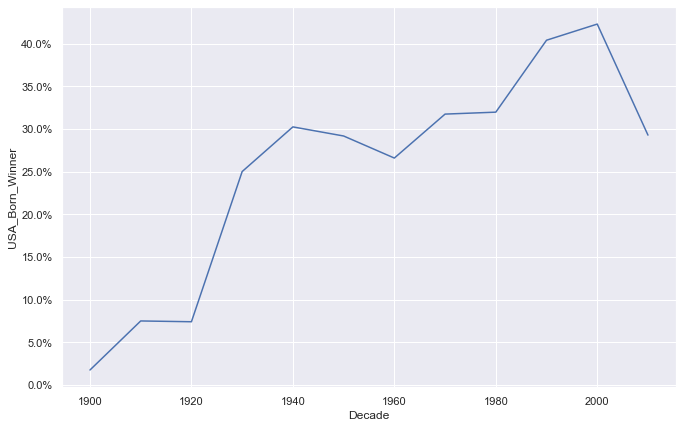

In [21]:
# Setting the plotting theme and the size of all plots
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='Decade', y='USA_Born_Winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

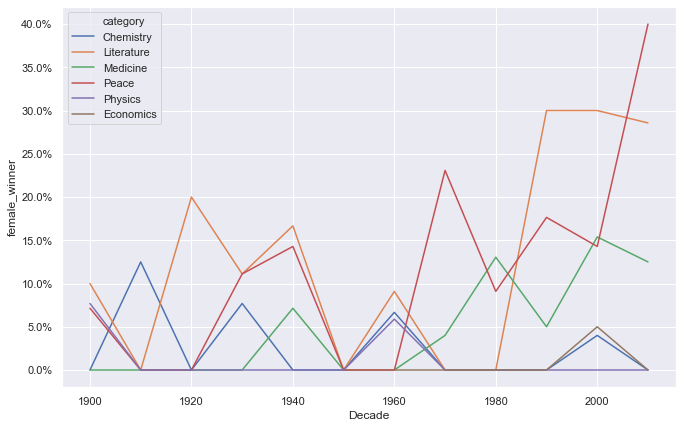

In [22]:
# Calculating the proportion of female laureates per decade
data['female_winner'] = data['sex'] == "Female"
prop_female_winners = data.groupby(['Decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='Decade', y='female_winner', hue='category', data=prop_female_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [23]:
# selecting out the first woman to win a Nobel Prize
data[data['sex'] == 'Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,usa_born_winner,decade,USA_born_winner,Decade,USA_Born_Winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,1934-07-04,Sallanches,France,False,1900,False,1900,False,True


In [24]:
# Selecting the laureates that have received more than one prizes.
data.groupby('full_name').filter(lambda x: len(x) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,usa_born_winner,decade,USA_born_winner,Decade,USA_Born_Winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,1934-07-04,Sallanches,France,False,1900,False,1900,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,France,1934-07-04,Sallanches,France,False,1910,False,1910,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,False,1910,False,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,False,1940,False,1940,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,True,1950,True,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,False,1950,False,1950,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,True,1950,True,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,1950,False,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,True,1960,True,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,False,1960,False,1960,False,False


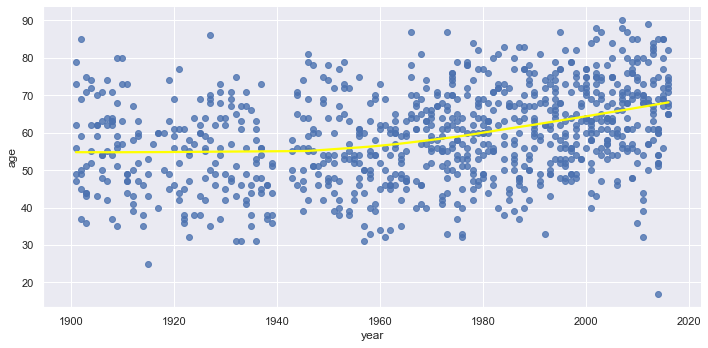

In [29]:
# Converting birth_date from String to datetime
data['birth_date'] = pd.to_datetime(data['birth_date'])

# Calculating the age of Nobel Prize winners
data['age'] = data['year'] - data['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=data, lowess=True, aspect=2, line_kws={'color': 'yellow'})

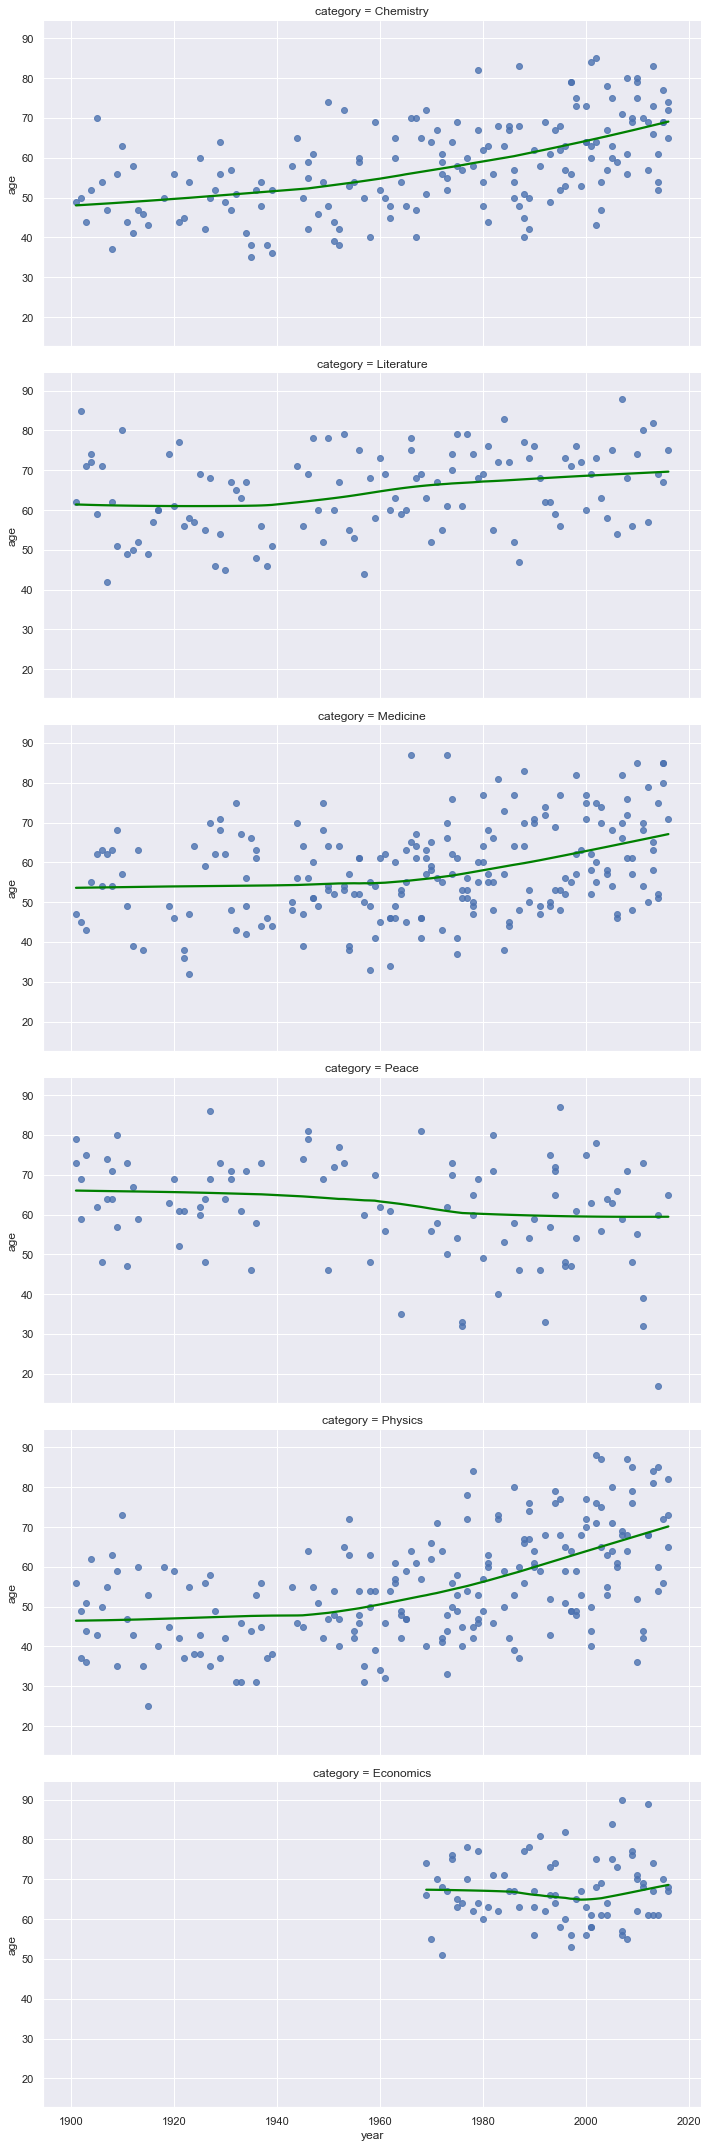

In [32]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=data, lowess=True, aspect=2, line_kws={'color': 'green'});

In [33]:
# The oldest winner of a Nobel Prize as of 2016
display(data.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
display(data.nsmallest(1, 'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,death_date,death_city,death_country,usa_born_winner,decade,USA_born_winner,Decade,USA_Born_Winner,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,2000,False,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,death_date,death_city,death_country,usa_born_winner,decade,USA_born_winner,Decade,USA_Born_Winner,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,False,2010,False,2010,False,True,17.0
